In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
domains = ['trait', 'risk', 'people', 'food', 'occupation', 'brand', 'good']
dims = [('masculine', 'feminine'),
       ('dread-inducing', 'unknowable'),
       ('warm', 'competent'),
       ('tasty', 'nutritious'),
       ('significance', 'autonomy'),
       ('sincere', 'exciting'),
       ('hedonic', 'utilitarian')]

In [3]:
def make_word_cloud(series, dim):
    associations_dict = series.to_dict()
    wordcloud = WordCloud(width=1350, height=750, max_words=50, background_color='white', 
                          relative_scaling=1, normalize_plurals=False).generate_from_frequencies(associations_dict)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(fname=f'figures/relative_association_wordclouds/{dim}.png')
    plt.show()

sincere


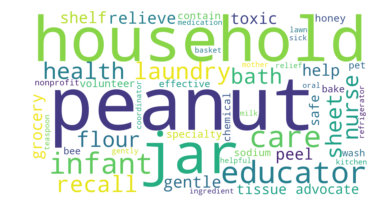

exciting


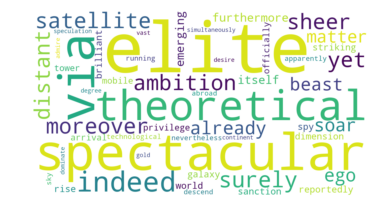

hedonic


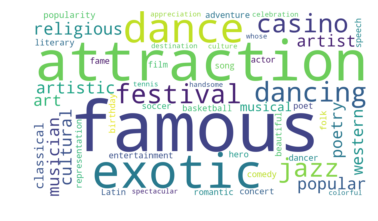

utilitarian


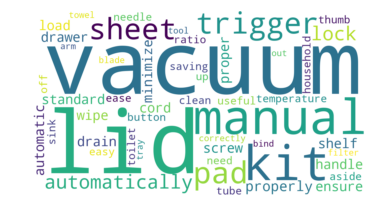

masculine


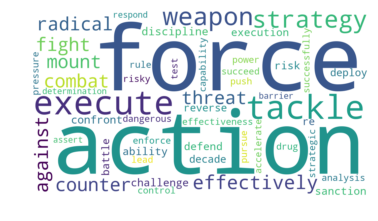

feminine


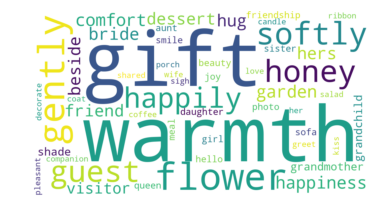

tasty


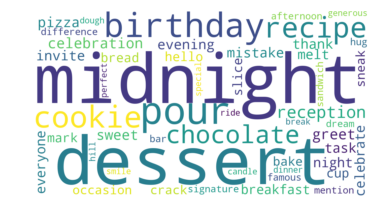

nutritious


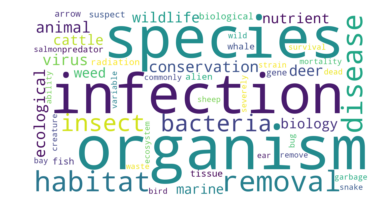

significance


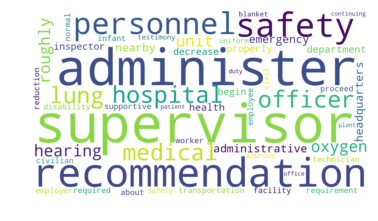

autonomy


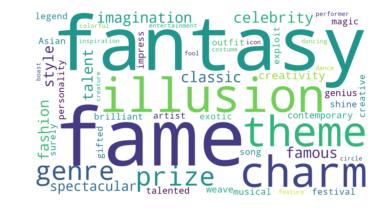

dread-inducing


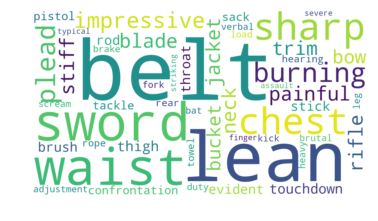

unknowable


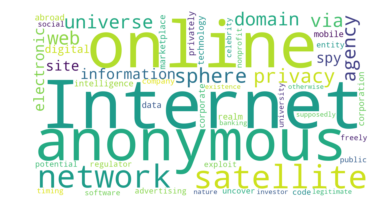

warm


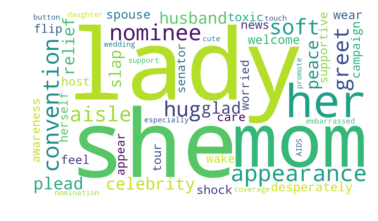

competent


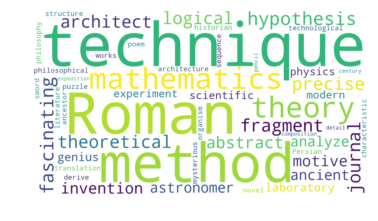

In [4]:
for dim_pair in dims:
    dim0 = dim_pair[0]
    dim1 = dim_pair[1]
    associations0 = pd.read_csv(f'results/judgment_associations/{dim0}.csv', header=None, index_col=0)[1]
    associations1 = pd.read_csv(f'results/judgment_associations/{dim1}.csv', header=None, index_col=0)[1]
    diff = associations0 - associations1
    
    print(dim0)
    high_dim0_assoc = diff
    make_word_cloud(high_dim0_assoc, dim0)
    
    print(dim1)
    low_dim0_assoc = -diff
    make_word_cloud(low_dim0_assoc, dim1)